<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_69/blob/main/Reto_Parte_2_Equipo_69.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Maestría en Inteligencia Artificial Aplicada
#Curso: Ciencia de los Datos
Tecnológico de Monterrey

Prof Dra. Maria de la Paz Rico Fernández

# Reto - Avance 2  -   **EQUIPO 69**
**AGUAS SUBTERRÁNEAS - MEXICO**

**Estudiantes:**
*   A01794050 - Moreno Villarreal José Bernardo 
*   A01793814 - Emerson Jonathan Rincón Morales 




In [53]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
#importación de librerías 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import power_transform 
from sklearn.preprocessing import StandardScaler
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn import tree
import graphviz 
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from PIL import Image
import pydotplus
from sklearn.tree import export_graphviz


In [55]:
#Lectura del archivo de Aguas subterráneas.
df=pd.read_csv('/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df.head(2)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [56]:
#copia del dataFrame para su análisis. 
df_Aguas_Subterraneas = df.copy() 

In [57]:
#Se verifica el tamaño del DataFrame
df_Aguas_Subterraneas.shape

(1068, 57)

#Limpieza de Datos

In [58]:
#Separación de columnas
columnas_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

In [59]:
columnas_numericas_obj = ['SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

In [60]:
Columnas_categoricas=['SUBTIPO','CALIDAD_ALC','CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'CALIDAD_DUR', 
       'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 
       'CALIDAD_MN',  'CALIDAD_FE', 'SEMAFORO', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE']

In [61]:
#Verificación del nombre de las columnas
df_Aguas_Subterraneas.columns
#DataFrame para trabajar 
df_num= df_Aguas_Subterraneas[columnas_numericas]
df_num

,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,NaN,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,231.990,608.0,NaN,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,204.920,532.0,NaN,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,327.000,686.0,NaN,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,309.885,1841.0,NaN,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,NaN,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1064,256.000,529.0,NaN,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1065,330.690,2600.0,NaN,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1066,193.140,873.0,NaN,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


In [62]:
#Se imputan las variables que previamente eran tipo float 
for nombres in ["CONDUCT_mS/cm","ALC_mg/L"]:
 tempVar=df_num[nombres].mean()
 df_num[nombres].fillna(value=tempVar,inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [63]:
#Imputación de los datos 
Imputation_List_Num = columnas_numericas_obj
#Se crea un diccionario para transformar los valores string a float
str_values = {"<25":"25","<0.2":"0.2","<20":"20","<1.1":"1.1","<0.02":"0.02",'<0.01':"0.01",'<0.003':"0.003",'<0.005':"0.005",'<0.0005':"0.0005",'<0.0015':"0.0015",'<0.025':"0.025"}
for nombres in Imputation_List_Num:
  for values in str_values: 
     df_num[nombres].astype(str)
     df_num[nombres]=df_num[nombres].str.replace(values,str_values[values]) 
  df_num[nombres]=df_num[nombres].astype(str).astype(float)
df_num.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   float64
 4   FLUORUROS_mg/L       1068 non-null   float64
 5   DUR_mg/L             1067 non-null   float64
 6   COLI_FEC_NMP/100_mL  1068 non-null   float64
 7   N_NO3_mg/L           1067 non-null   float64
 8   AS_TOT_mg/L          1068 non-null   float64
 9   CD_TOT_mg/L          1068 non-null   float64
 10  CR_TOT_mg/L          1068 non-null   float64
 11  HG_TOT_mg/L          1068 non-null   float64
 12  PB_TOT_mg/L          1068 non-null   float64
 13  MN_TOT_mg/L          1068 non-null   float64
 14  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(15)
memory usage: 125.3 KB


In [64]:
#Verificación que el set se encuentre limpio
df_num.drop(columns=["SDT_mg/L"], inplace = True)
df_num.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


ALC_mg/L               0
CONDUCT_mS/cm          0
SDT_M_mg/L             2
FLUORUROS_mg/L         0
DUR_mg/L               1
COLI_FEC_NMP/100_mL    0
N_NO3_mg/L             1
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

##Label Encoder y Selección de variables independientes y dependientes. 

In [65]:
#Imputación de variables
for nombres in Imputation_List_Num:
  tempVar = df_num[nombres].mean()
  df_num[nombres].fillna(value= tempVar, inplace = True)
df_num.isna().sum()

ALC_mg/L               0
CONDUCT_mS/cm          0
SDT_M_mg/L             0
FLUORUROS_mg/L         0
DUR_mg/L               0
COLI_FEC_NMP/100_mL    0
N_NO3_mg/L             0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

In [66]:
#Aplicando Label Encoding. Se verifica la variable de salida "Semáforo" como originalmente
df["SEMAFORO"]

0       Verde
1       Verde
2        Rojo
3       Verde
4        Rojo
        ...  
1063     Rojo
1064     Rojo
1065     Rojo
1066    Verde
1067    Verde
Name: SEMAFORO, Length: 1068, dtype: object

In [67]:
#Se aplica Label Encoder y se verifican los nuevos datos
le= LabelEncoder()
df.iloc[:,40]=le.fit_transform(df.iloc[:,40])
df.iloc[:,40]

0       2
1       2
2       1
3       2
4       1
       ..
1063    1
1064    1
1065    1
1066    2
1067    2
Name: SEMAFORO, Length: 1068, dtype: int64

#Explorar Datos

In [68]:
#Descripción de los datos 
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1068.0,235.633759,116.655014,26.6400,164.048750,215.825000,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1138.953013,1242.056683,50.4000,505.500000,822.500000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,896.101567,2748.950627,25.0000,337.700000,551.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.2000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.938073,359.500870,20.0000,121.274100,245.662350,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.1000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.319759,8.341222,0.0200,0.650932,2.082916,5.200047,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.0100,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,1068.0,0.003030,0.000894,0.0030,0.003000,0.003000,0.003000,0.032110
CR_TOT_mg/L,1068.0,0.013276,0.154391,0.0050,0.005000,0.005000,0.005000,5.003200


In [69]:
df_str = df_num.astype(int)

In [70]:
columns_plot= ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L',
 'FLUORUROS_mg/L',
 'DUR_mg/L',
 'COLI_FEC_NMP/100_mL',
 'N_NO3_mg/L',
 'AS_TOT_mg/L',
 'CD_TOT_mg/L',
 'CR_TOT_mg/L',
 'HG_TOT_mg/L',
 'PB_TOT_mg/L',
 'MN_TOT_mg/L',
 'FE_TOT_mg/L',
 'ALC_mg/L']

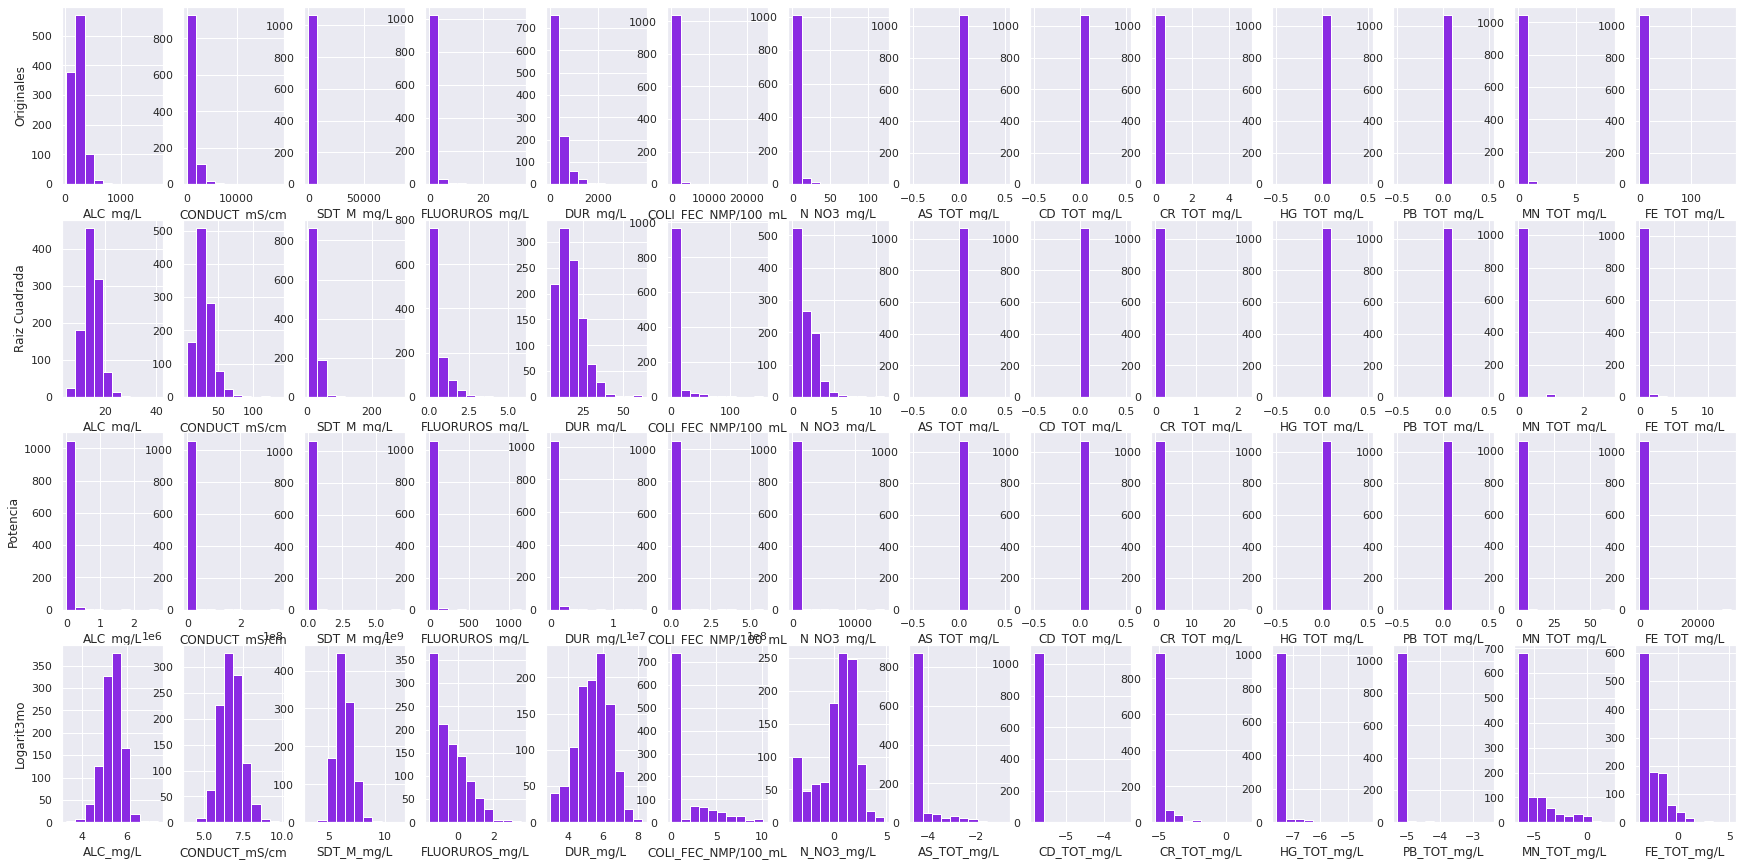

In [71]:
#Plot de los datos con transformaciones propuestas
sns.set(rc={'figure.figsize':(30,15)})
for k in range(len(columns_plot)-1):
    Color="blueviolet"
    plt.subplot(4,14,k+1)
    plt.hist(df_str[columns_plot[k]], bins=10, color = Color)
    plt.xlabel(columns_plot[k])
    if k==0:
        plt.ylabel("Originales")


    transf1 = df_str[columns_plot[k]]**(1/2)
    plt.subplot(4,14,k+15)
    plt.hist(transf1, bins=10, color = Color)
    plt.xlabel(columns_plot[k])
    if k==0:
        plt.ylabel("Raiz Cuadrada")



    transf2 = df_str[columns_plot[k]]**(2)
    plt.subplot(4,14,k+29)
    plt.hist(transf2, bins=10, color = Color)
    plt.xlabel(columns_plot[k])
    if k==0:
        plt.ylabel("Potencia")



    transf3 = np.log(df_num[columns_plot[k]])
    plt.subplot(4,14,k+43)
    plt.hist(transf3, bins=10, color = Color)
    plt.xlabel(columns_plot[k])
    if k==0:
        plt.ylabel("Logarit3mo")



Comentario: 
Se observa que la mejor transformación es la logarítimica

In [72]:
df_analysis = np.log(df_num)

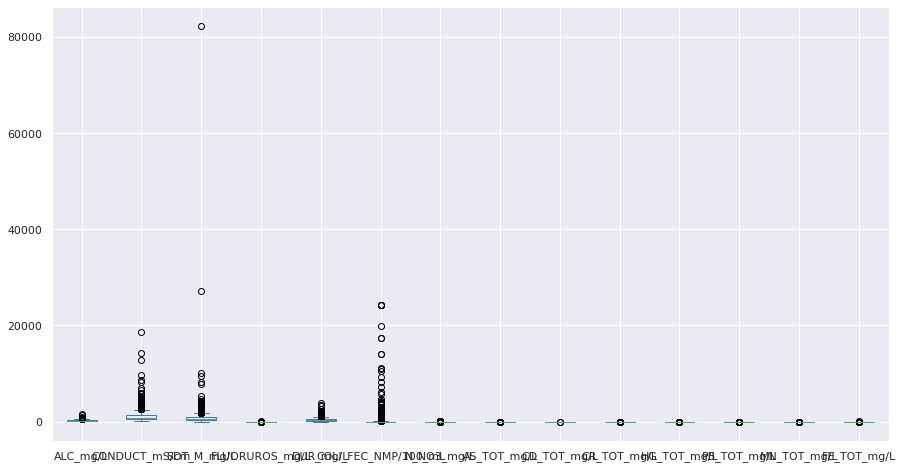

In [73]:
#Plot de las variables antes y después de transformarse para observar outliers
sns.set(rc={'figure.figsize':(15,8)})
df_num.plot.box()

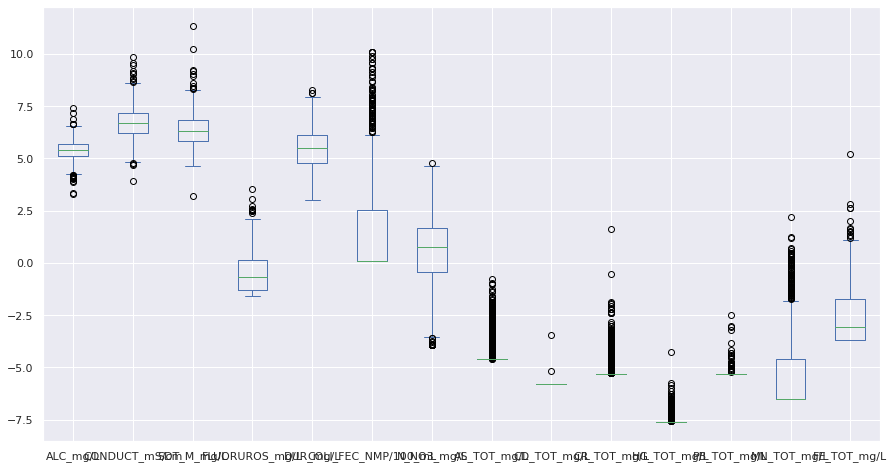

In [74]:
#Datos con transformacion logaritmica
sns.set(rc={'figure.figsize':(15,8)})
df_analysis.plot.box()

#Feature Importance

In [75]:
X=df_num.copy()
y=df["SEMAFORO"]

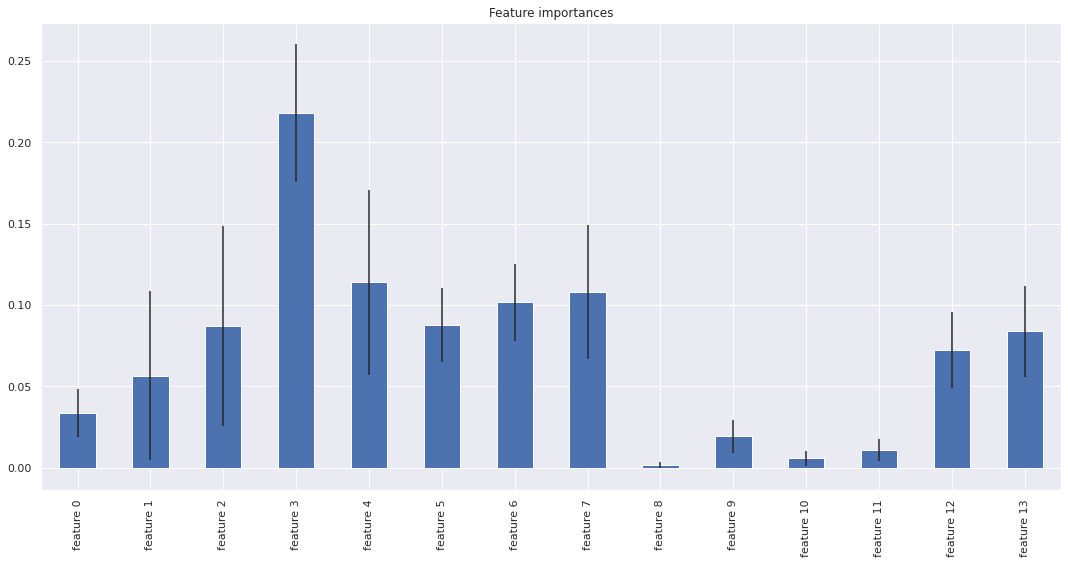

In [76]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

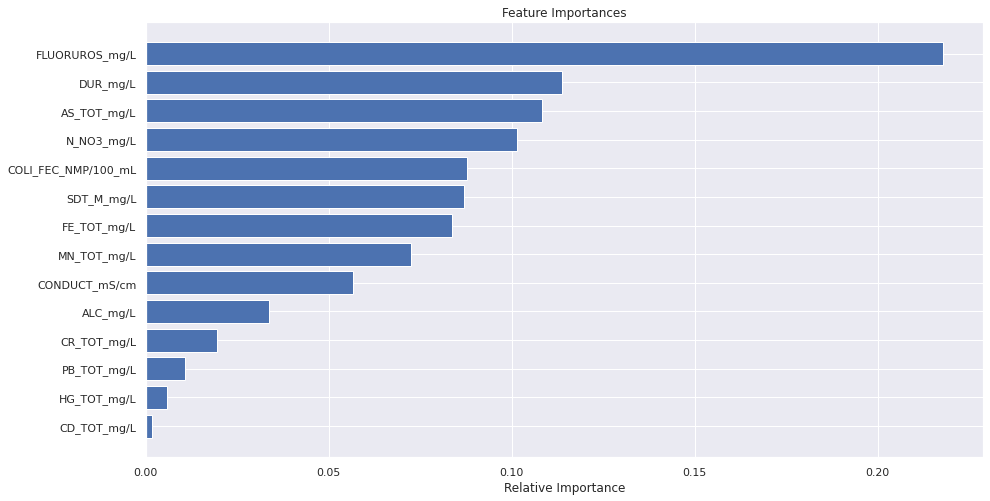

In [79]:

indices = np.argsort(importances)
features= X.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


#Variables de Mayor importancia

In [80]:
X.columns
#Determinación de variable de salida
y=df.iloc[:,40]

In [81]:
VariablesImportantes=X[[ 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L','MN_TOT_mg/L',
       'FE_TOT_mg/L']]

#Partición de Datos

In [82]:
#Particiòn de datos de entrenamiento y validación 85% 
Xtrain, Xval, ytrain, yval = train_test_split(VariablesImportantes, y, train_size=0.80)


print("Columnas entrenamiento: \n" + str(Xtrain.columns))
print("\n")
print("Columnas validación: \n" + str(Xval.columns))

Columnas entrenamiento: 
Index(['CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')


Columnas validación: 
Index(['CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')


In [83]:
print("Total de Datos: ", len(X))
print("Datos Entrenamiento: ",len(Xtrain))
print("Datos de Prueba: ", len(Xval))


Total de Datos:  1068
Datos Entrenamiento:  854
Datos de Prueba:  214


In [84]:
yval.value_counts()

2    82
1    79
0    53
Name: SEMAFORO, dtype: int64

#Clasificador y modelo óptimo

###Decision Tree

In [85]:
DT=tree.DecisionTreeClassifier(class_weight="balanced", max_depth=6)
clf= DT.fit(Xtrain,ytrain)


In [86]:
y_predDT= DT.predict(Xval)
from sklearn.metrics import recall_score
print("Recall:",recall_score(yval, y_predDT, average='weighted'))

Recall: 0.8878504672897196


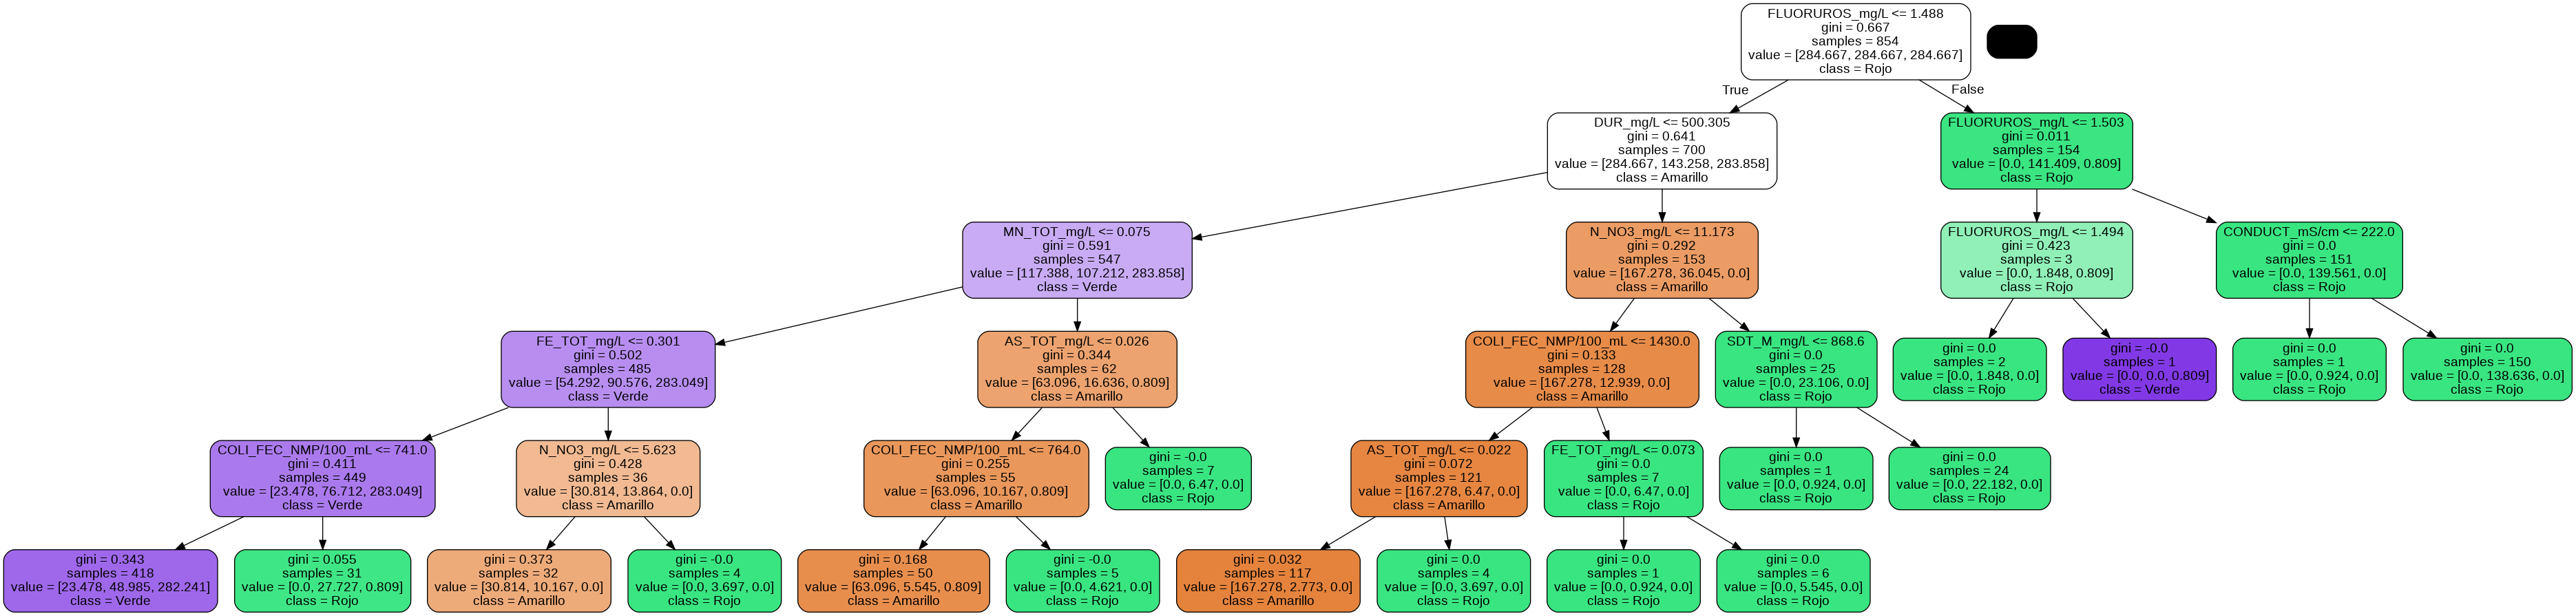

In [87]:
#Llamamos la clasificaicon del arbol
arbolito_clasificador = tree.DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced') #Aqui nos va a balancear la salida
arbolito_clasificador = arbolito_clasificador.fit(Xtrain, ytrain)
arbol= export_graphviz (arbolito_clasificador,
                        out_file = None,
                        feature_names= Xtrain.columns,
                        class_names = ['Amarillo','Rojo','Verde'],
                        rounded = True,
                        filled = True)
import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(arbol)
graph.write_png('Arbol.png')
Image(filename = 'Arbol.png')

###Random Forest

In [119]:
RF=RandomForestClassifier(class_weight="balanced", max_depth=6)
clf_rf= RF.fit(Xtrain,ytrain)
y_predRF= RF.predict(Xval)
print("Recall:",recall_score(yval, y_predRF, average='weighted'))

Recall: 0.9439252336448598


#Grado de Exactitud

In [89]:
target_names = ['Amarillo', 'Rojo', 'Verde']
print("Decision Tree \n")
print(classification_report(yval.ravel(), y_predDT, target_names=target_names))

Decision Tree 

              precision    recall  f1-score   support

    Amarillo       0.84      0.89      0.86        53
        Rojo       1.00      0.82      0.90        79
       Verde       0.84      0.95      0.89        82

    accuracy                           0.89       214
   macro avg       0.89      0.89      0.89       214
weighted avg       0.90      0.89      0.89       214



In [90]:
print("Random Forest \n")
print(classification_report(yval.ravel(), y_predRF, target_names=target_names))

Random Forest 

              precision    recall  f1-score   support

    Amarillo       0.86      0.96      0.91        53
        Rojo       0.99      0.92      0.95        79
       Verde       0.95      0.94      0.94        82

    accuracy                           0.94       214
   macro avg       0.93      0.94      0.94       214
weighted avg       0.94      0.94      0.94       214



In [91]:
eclf1 = VotingClassifier(estimators=[
        ('dt', DT), ('rf', RF)], voting='hard')
eclf1 = eclf1.fit(Xtrain, ytrain)
ypredVotosHard=eclf1.predict(Xval)
print(classification_report(yval.ravel(), ypredVotosHard, target_names=target_names))


              precision    recall  f1-score   support

    Amarillo       0.81      0.96      0.88        53
        Rojo       0.97      0.91      0.94        79
       Verde       0.95      0.89      0.92        82

    accuracy                           0.92       214
   macro avg       0.91      0.92      0.91       214
weighted avg       0.92      0.92      0.92       214



In [92]:
eclf2 = VotingClassifier(estimators=[
        ('dt', DT), ('rf', RF)], voting='soft')
eclf2 = eclf2.fit(Xtrain, ytrain)
ypredVotosSoft=eclf2.predict(Xval)
print(classification_report(yval.ravel(), ypredVotosSoft, target_names=target_names))

              precision    recall  f1-score   support

    Amarillo       0.84      0.89      0.86        53
        Rojo       1.00      0.82      0.90        79
       Verde       0.84      0.95      0.89        82

    accuracy                           0.89       214
   macro avg       0.89      0.89      0.89       214
weighted avg       0.90      0.89      0.89       214



#Matriz de Confusión

In [116]:

def mi_cm(yreal, ypred,name):

  cm = confusion_matrix(yreal, ypred)
  cm_df = pd.DataFrame(cm,
                     index = ['AMARILLO','ROJO','VERDE'], 
                     columns =  ['AMARILLO','ROJO','VERDE'])
  plt.figure(figsize=(5,4))

  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]
  txt = ['P0,0','P0,1','P0,2',
       'P1,0','P1,1','P1,2',
       'P2,0','P2,1','P2,2',]

  labels = [f"{v1}\n{v2}" for v1, v2 in zip(frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(3,3)
  labels

  sns.heatmap(cm_df, annot=labels,  fmt='', cmap="BuPu", cbar=False)
  plt.title('Confusion Matrix '+ name)
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')


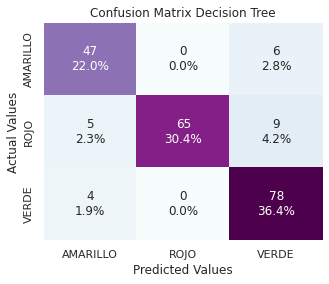

In [117]:
mi_cm(yval.ravel(),y_predDT,"Decision Tree")

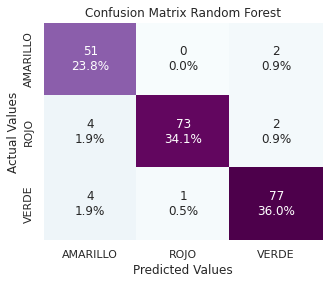

In [118]:
mi_cm(yval.ravel(),y_predRF,"Random Forest")

#**Conclusiones**
Después de haber realizado la limpieza de datos y análisis de Feature Importance, se observa que la variable con la mayor relevancia para la predicción correcta del modelo es la cantidad del Fluor en el agua. Esto coincide con lo observaado en la gráfica de K-means en donde observamos que la distribución de la clasificación de esta variable coincide con la distribución geográfica del semáfoto a lo largo de la república mexicana. 

Se observa que el modelo óptimo puede ser obtenido utilizando Random Forest al confirmarlo a través del índice de Recall de 94% y comprobado a través de la matriz de confusión en donde el modelo elige correctamente sobre la clase de interés. 